# Analyzing Top Albums and Songs using Spotify's API
***
This is an analysis of what is regarded as eight of some of the most popular albums of all time from four different genres: Hip-Hip/Rap, Pop, Rock, and Electronic/Dance. I analyze two albums from each genre. I am also analyzing two of the top songs from each respective album in terms of popularity to see if there are common themes between these albums and the songs in hopes of seeing if there are common elements between them all that have made them all so successful. This is all done using Spotify's API along with the Spotipy library, which allows me to see behind the scenes with these albums and the songs on all of the albums to see the metadata and what makes these albums/songs so great. With this, someone could copy possible elements that create a great song or album based on the results to make their own hit music that could reach the billboards someday.

Spotify uses various musical elements to identify songs and categorize them, which we will use for this analysis. Spotify provides the following definitions for its audio features:

- **Acousticness**: A measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- **Danceability**: A measure from 0.0 to 1.0 of how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- **Duration_ms**: The duration of the track in milliseconds.

- **Energy**: A measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

- **Instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- **Key**: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

- **Liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- **Loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

- **Mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- **Speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- **Tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- **Time_signature**: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

- **Valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed

- **Popularity**: Calculates the number of plays and how recent they are. The value range is from 0-100, with 100 being the most popular.

The first genre we will analyze is Hip-Hop/Rap. The first album we will look at is Illmatic by Nas.

In [16]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

https://github.com/DataScienceColorado/DTSA-5510-Unsupervised-Algorithms-in-Machine-Learning-Final-Project

In [2]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyOAuth

def get_track_ids_and_names_from_album(album_id):
    track_ids = []
    track_names = []
    offset = 0
    limit = 50

    while True:
        results = sp.album_tracks(album_id, offset=offset, limit=limit)
        tracks = results['items']
        if not tracks:
            break

        for track in tracks:
            track_ids.append(track['id'])
            track_names.append(track['name'])

        offset += limit

    return track_ids, track_names

def get_audio_features_and_popularity(track_ids):
    audio_features = sp.audio_features(track_ids)
    track_popularity = [sp.track(id)["popularity"] for id in track_ids]
    
    for feature, popularity in zip(audio_features, track_popularity):
        feature["popularity"] = popularity

    return audio_features

def create_audio_features_dataframe(audio_features, track_names):
    df = pd.DataFrame(audio_features)

    df.drop(columns=['type', 'uri', 'track_href', 'analysis_url'], inplace=True)

    df['duration_ms'] = df['duration_ms'] / 1000
    df.rename(columns={'duration_ms': 'Duration_seconds'}, inplace=True)

    df['Track_Name'] = track_names

    df.set_index('Track_Name', inplace=True)

    df.columns = [col.capitalize() for col in df.columns]

    return df

client_id = '63bedde13856442f906a5c9fb87064c0'
client_secret = '930d975e27f94e019e58765d35c5dccf'
redirect_uri = 'http://localhost:8000/callback/'

auth_manager = SpotifyOAuth(
    client_id=client_id,
    client_secret=client_secret,
    redirect_uri=redirect_uri,
    scope="user-library-read"
)
sp = spotipy.Spotify(auth_manager=auth_manager)

album_id = '3kEtdS2pH6hKcMU9Wioob1'
track_ids, track_names = get_track_ids_and_names_from_album(album_id)
audio_features = get_audio_features_and_popularity(track_ids)
audio_features_df = create_audio_features_dataframe(audio_features, track_names)

print(audio_features_df.head(20))

                                      Danceability  Energy  Key  Loudness  \
Track_Name                                                                  
The Genesis                                  0.613   0.899    1    -4.669   
N.Y. State of Mind                           0.665   0.910    6    -4.682   
Life's a Bitch (feat. AZ & Olu Dara)         0.775   0.734    7    -5.410   
The World Is Yours                           0.678   0.794   10    -6.186   
Halftime                                     0.766   0.793    4    -6.638   
Memory Lane (Sittin' in da Park)             0.648   0.841    0    -4.322   
One Love (feat. Q-Tip)                       0.765   0.687    0    -6.664   
One Time 4 Your Mind                         0.823   0.547    4    -6.928   
Represent                                    0.708   0.832    1    -4.964   
It Ain't Hard to Tell                        0.690   0.729   11    -5.819   

                                      Mode  Speechiness  Acousticness  \
Tr

One thing we can draw from the results above in terms of the songs that have the highest popularity is that:

The most popular songs have high energy scores. Energy is a measure from 0.0 to 1.0, representing a perceptual measure of intensity and activity. This suggests that more energetic songs are more prevalent in this album.

Similarly, the songs with higher popularity tend to have higher danceability scores. Danceability describes a track's suitability for dancing based on a combination of musical elements, including tempo, rhythm stability, beat strength, and overall regularity. This suggests that more danceable tracks are more popular in this album.

The most popular songs also tend to be louder. This is not always the case but it is a pattern in this dataset.

The relationship between valence (a measure of musical positiveness) and popularity seems less clear. Some popular songs have high valence, while others have low valence. This suggests that the song's mood doesn't necessarily determine its popularity.

Speechiness measures the presence of spoken words in a track. In this dataset, it does not appear that a higher presence of spoken words correlates with higher popularity.

So overall, the songs with the highest popularity score have high energy and danceability scores. Next, we'll take another rap album that is considered one of the best rap albums of all time and see if there's the same trend. This album is Ready to Die by The Notorious B.I.G.

In [55]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyOAuth

def get_track_ids_and_names_from_album(album_id):
    track_ids = []
    track_names = []
    offset = 0
    limit = 50

    while True:
        results = sp.album_tracks(album_id, offset=offset, limit=limit)
        tracks = results['items']
        if not tracks:
            break

        for track in tracks:
            track_ids.append(track['id'])
            track_names.append(track['name'])

        offset += limit

    return track_ids, track_names

def get_audio_features_and_popularity(track_ids):
    audio_features = sp.audio_features(track_ids)
    track_popularity = [sp.track(id)["popularity"] for id in track_ids]
    
    for feature, popularity in zip(audio_features, track_popularity):
        feature["popularity"] = popularity

    return audio_features

def create_audio_features_dataframe(audio_features, track_names):
    df = pd.DataFrame(audio_features)

    df.drop(columns=['type', 'uri', 'track_href', 'analysis_url'], inplace=True)

    df['duration_ms'] = df['duration_ms'] / 1000
    df.rename(columns={'duration_ms': 'Duration_seconds'}, inplace=True)

    df['Track_Name'] = track_names

    df.set_index('Track_Name', inplace=True)

    df.columns = [col.capitalize() for col in df.columns]

    return df

client_id = '63bedde13856442f906a5c9fb87064c0'
client_secret = '930d975e27f94e019e58765d35c5dccf'
redirect_uri = 'http://localhost:8000/callback/'

auth_manager = SpotifyOAuth(
    client_id=client_id,
    client_secret=client_secret,
    redirect_uri=redirect_uri,
    scope="user-library-read"
)
sp = spotipy.Spotify(auth_manager=auth_manager)

album_id = '2HTbQ0RHwukKVXAlTmCZP2'
track_ids, track_names = get_track_ids_and_names_from_album(album_id)
audio_features = get_audio_features_and_popularity(track_ids)
audio_features_df = create_audio_features_dataframe(audio_features, track_names)

print(audio_features_df.head(20))


                                                Danceability  Energy  Key  \
Track_Name                                                                  
Intro - 2005 Remaster                                  0.563   0.694   11   
Things Done Changed - 2005 Remaster                    0.743   0.630    1   
Gimme the Loot - 2005 Remaster                         0.721   0.662    7   
Machine Gun Funk - 2006 Remaster                       0.841   0.738    4   
Warning - 2005 Remaster                                0.596   0.791   11   
Ready to Die - 2006 Remaster                           0.727   0.831    6   
One More Chance - 2005 Remaster                        0.731   0.695   10   
Fuck Me (Interlude) - Interlude; 2005 Remaster         0.435   0.612   11   
The What                                               0.622   0.714    7   
Juicy - 2005 Remaster                                  0.889   0.818    9   
Everyday Struggle - 2005 Remaster                      0.913   0.712    1   

Some rank this album as the best rap album of all time as it was a defining album in transitioning hip-hop's golden age into its modern age. It was also the height of New York hip-hop, from who was considered the greatest rapper of all time at that moment and, to this day, still is regarded as the greatest of all time by some. It's the album that made Hip-Hop/Rap mainstream. With this said, here are some trends the most popular tracks had from a musical aspect:

The most popular songs like "Big Poppa - 2005 Remaster", "Juicy - 2005 Remaster", and "Gimme the Loot - 2005 Remaster" have high danceability scores (0.780, 0.889, 0.721 respectively), which is slightly above the album average of 0.722. This indicates that more danceable songs are more popular in this album.

The most popular songs also tend to have high energy scores. For example, "Big Poppa - 2005 Remaster" and "Juicy - 2005 Remaster" have energy scores of 0.575 and 0.818, respectively, in line with the average energy score of 0.694 for the album. However, the energy score for "Gimme the Loot - 2005 Remaster" is slightly below the album average at 0.662.

The popular songs tend to have a higher level of acousticness, with scores for "Big Poppa - 2005 Remaster", "Juicy - 2005 Remaster", and "Gimme the Loot - 2005 Remaster" being 0.430, 0.470, and 0.0888, respectively. The average for the album is 0.241, indicating that listeners seem to prefer tracks with a higher degree of acoustic sound.

Comparing these results with Nas' Illmatic album, there is a trend with what's regarded as some of the most popular rap albums of all time. They both have fairly high danceability and energy scores, especially when it comes to the most popular tracks specifically. I'm focusing more on the most popular tracks from each album because those are the songs that lift the album's popularity because of how good they are. This goes with any album. There are typically those 2-4 songs in an album that are incredibly popular that lift up the album's notoriety along with the perception of how good the album overall is. If you were to take these popular tracks and turn them into the average popularity and musical aspect scores that we've gone over so far, the albums would not be considered as significant as they are.

I don't want to just look at two of some of the most popular and well-respected Hip-Hop/Rap albums of all time since we'd only be looking at one genre. I want to look at three other musical genres that're regarded as some of the most popular in the music industry. I'll be looking at what's seen as two of the top albums of all time from Pop, Rock, and Electronic/Dance music.

First, we will look at two of some of the most famous Pop albums of all time. These two will be Thriller by Michael Jackson and ...Baby One More Time by Britney Spears. It was definitely to find Pop albums that were solely focused on being mainly just in the Pop genre since a lot of albums that had some Pop elements in them but were also Rock were ones I could've put over Britney Spears's album that we'll be looking at, but this was her debut album that was her best-selling at having sold over 25 million copies worldwide while also making it one of the best-selling albums of all time.

In [57]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyOAuth

def get_track_ids_and_names_from_album(album_id):
    track_ids = []
    track_names = []
    offset = 0
    limit = 50

    while True:
        results = sp.album_tracks(album_id, offset=offset, limit=limit)
        tracks = results['items']
        if not tracks:
            break

        for track in tracks:
            track_ids.append(track['id'])
            track_names.append(track['name'])

        offset += limit

    return track_ids, track_names

def get_audio_features_and_popularity(track_ids):
    audio_features = sp.audio_features(track_ids)
    track_popularity = [sp.track(id)["popularity"] for id in track_ids]
    
    for feature, popularity in zip(audio_features, track_popularity):
        feature["popularity"] = popularity

    return audio_features

def create_audio_features_dataframe(audio_features, track_names):
    df = pd.DataFrame(audio_features)

    df.drop(columns=['type', 'uri', 'track_href', 'analysis_url'], inplace=True)

    df['duration_ms'] = df['duration_ms'] / 1000
    df.rename(columns={'duration_ms': 'Duration_seconds'}, inplace=True)

    df['Track_Name'] = track_names

    df.set_index('Track_Name', inplace=True)

    df.columns = [col.capitalize() for col in df.columns]

    return df

client_id = '63bedde13856442f906a5c9fb87064c0'
client_secret = '930d975e27f94e019e58765d35c5dccf'
redirect_uri = 'http://localhost:8000/callback/'

auth_manager = SpotifyOAuth(
    client_id=client_id,
    client_secret=client_secret,
    redirect_uri=redirect_uri,
    scope="user-library-read"
)
sp = spotipy.Spotify(auth_manager=auth_manager)

album_id = '2ANVost0y2y52ema1E9xAZ'
track_ids, track_names = get_track_ids_and_names_from_album(album_id)
audio_features = get_audio_features_and_popularity(track_ids)
audio_features_df = create_audio_features_dataframe(audio_features, track_names)

print(audio_features_df.head(20))

                                        Danceability  Energy  Key  Loudness  \
Track_Name                                                                    
Wanna Be Startin' Somethin'                    0.842   0.872    9    -8.234   
Baby Be Mine                                   0.843   0.483   11   -10.288   
The Girl Is Mine (with Paul McCartney)         0.681   0.527    9   -10.422   
Thriller                                       0.771   0.687   11    -9.814   
Beat It                                        0.776   0.711    3    -9.030   
Billie Jean                                    0.932   0.457   11    -9.620   
Human Nature                                   0.628   0.409    2   -14.348   
P.Y.T. (Pretty Young Thing)                    0.894   0.670   11    -9.406   
The Lady in My Life                            0.662   0.344    9   -13.930   

                                        Mode  Speechiness  Acousticness  \
Track_Name                                             

What we see from this album which is similar to the two Rap albums, is that:

The most popular songs from this album, like "Billie Jean" (0.932) and "Beat It" (0.776), have high danceability scores, indicating that the more danceable the song, the more popular it seems to be among listeners.

Songs with higher energy are also more popular. For instance, "Wanna Be Startin' Somethin'" and "Beat It" have relatively high energy scores (0.872 and 0.711, respectively).

The most popular songs on the Thriller album tend to be more danceable, energetic, and upbeat, with more vocal content and varying levels of acousticness and tempo. This suggests that listeners appreciate a combination of high-energy dance tracks and emotionally resonant songs.

The theme with the three albums we've looked at is that the danceability and energy are high with the most popular songs on the albums. We'll see if the other albums follow the same trend since we're almost at the halfway point in terms of the total albums we're going to look at and the trend the most popular songs have. Still, I'm confident these other upcoming albums will also follow the same direction with their respective popularity in songs at the top of the album.

Britney Spears' debut album ...Baby One More Time, is the best-selling debut album by a female artist and one of the best-selling albums ever. Let's take a look at it.

In [59]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyOAuth

def get_track_ids_and_names_from_album(album_id):
    track_ids = []
    track_names = []
    offset = 0
    limit = 50

    while True:
        results = sp.album_tracks(album_id, offset=offset, limit=limit)
        tracks = results['items']
        if not tracks:
            break

        for track in tracks:
            track_ids.append(track['id'])
            track_names.append(track['name'])

        offset += limit

    return track_ids, track_names

def get_audio_features_and_popularity(track_ids):
    audio_features = sp.audio_features(track_ids)
    track_popularity = [sp.track(id)["popularity"] for id in track_ids]
    
    for feature, popularity in zip(audio_features, track_popularity):
        feature["popularity"] = popularity

    return audio_features

def create_audio_features_dataframe(audio_features, track_names):
    df = pd.DataFrame(audio_features)

    df.drop(columns=['type', 'uri', 'track_href', 'analysis_url'], inplace=True)

    df['duration_ms'] = df['duration_ms'] / 1000
    df.rename(columns={'duration_ms': 'Duration_seconds'}, inplace=True)

    df['Track_Name'] = track_names

    df.set_index('Track_Name', inplace=True)

    df.columns = [col.capitalize() for col in df.columns]

    return df

client_id = '63bedde13856442f906a5c9fb87064c0'
client_secret = '930d975e27f94e019e58765d35c5dccf'
redirect_uri = 'http://localhost:8000/callback/'

auth_manager = SpotifyOAuth(
    client_id=client_id,
    client_secret=client_secret,
    redirect_uri=redirect_uri,
    scope="user-library-read"
)
sp = spotipy.Spotify(auth_manager=auth_manager)

album_id = '3WNxdumkSMGMJRhEgK80qx'
track_ids, track_names = get_track_ids_and_names_from_album(album_id)
audio_features = get_audio_features_and_popularity(track_ids)
audio_features_df = create_audio_features_dataframe(audio_features, track_names)

print(audio_features_df.head(20))

                                                   Danceability  Energy  Key  \
Track_Name                                                                     
...Baby One More Time                                     0.759   0.699    0   
(You Drive Me) Crazy                                      0.748   0.939    0   
Sometimes                                                 0.745   0.742   10   
Soda Pop                                                  0.714   0.852    8   
Born to Make You Happy                                    0.633   0.922   11   
From the Bottom of My Broken Heart                        0.677   0.665    7   
I Will Be There                                           0.659   0.866    8   
I Will Still Love You (with Don Philip)                   0.658   0.868    1   
Deep In My Heart                                          0.799   0.783    6   
Thinkin' About You                                        0.756   0.700    0   
E-Mail My Heart                         

Some general insights we can draw from this data are:

The average danceability score for this album is 0.723, suggesting that the songs in this album are pretty suitable for dancing.
The album's energy level is quite high, with an average energy score of 0.785, suggesting that the songs are fast, loud, and noisy.
The average valence (musical positiveness) of the songs is 0.768, suggesting that the overall mood of the pieces in this album is quite positive.

Generally, these results are to be expected with a Pop album, but looking at some of the most popular songs from this album are their traits, we see that:

The most popular songs on this album are "...Baby One More Time" and "(You Drive Me) Crazy."
Both tracks have high danceability scores (0.759 and 0.748, respectively). This suggests that these songs have a suitable rhythm for dancing, which might be one of the factors contributing to their popularity.
Both songs also have high energy scores (0.699 and 0.939, respectively). This indicates that these songs are fast, loud, and noisy, which is often characteristic of popular, upbeat pop songs.
Both "...Baby One More Time" and "(You Drive Me) Crazy" have high valence scores (0.907 and 0.960, respectively), indicating that they are musically positive and cheerful. This could suggest that listeners are drawn to these songs' positive and uplifting nature.

What we can draw in terms of a conclusion again is that danceability and energy play a big part in the most popular songs from this album, just like the others. When it comes to Pop albums, valence plays a big part in Pop songs, which has to do with how musically positive and cheerful the songs are. This is very true in the Pop genre, which is generally why Pop songs a lot of the time, especially Pop artists, are, on average, so successful.

Next, we will look at two of the top Rock albums of all time. These are Pink Floyd's The Dark Side of the Moon and Fleetwood Mac's Rumours.

In [60]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyOAuth

def get_track_ids_and_names_from_album(album_id):
    track_ids = []
    track_names = []
    offset = 0
    limit = 50

    while True:
        results = sp.album_tracks(album_id, offset=offset, limit=limit)
        tracks = results['items']
        if not tracks:
            break

        for track in tracks:
            track_ids.append(track['id'])
            track_names.append(track['name'])

        offset += limit

    return track_ids, track_names

def get_audio_features_and_popularity(track_ids):
    audio_features = sp.audio_features(track_ids)
    track_popularity = [sp.track(id)["popularity"] for id in track_ids]
    
    for feature, popularity in zip(audio_features, track_popularity):
        feature["popularity"] = popularity

    return audio_features

def create_audio_features_dataframe(audio_features, track_names):
    df = pd.DataFrame(audio_features)

    df.drop(columns=['type', 'uri', 'track_href', 'analysis_url'], inplace=True)

    df['duration_ms'] = df['duration_ms'] / 1000
    df.rename(columns={'duration_ms': 'Duration_seconds'}, inplace=True)

    df['Track_Name'] = track_names

    df.set_index('Track_Name', inplace=True)

    df.columns = [col.capitalize() for col in df.columns]

    return df

client_id = '63bedde13856442f906a5c9fb87064c0'
client_secret = '930d975e27f94e019e58765d35c5dccf'
redirect_uri = 'http://localhost:8000/callback/'

auth_manager = SpotifyOAuth(
    client_id=client_id,
    client_secret=client_secret,
    redirect_uri=redirect_uri,
    scope="user-library-read"
)
sp = spotipy.Spotify(auth_manager=auth_manager)

album_id = '4LH4d3cOWNNsVw41Gqt2kv'
track_ids, track_names = get_track_ids_and_names_from_album(album_id)
audio_features = get_audio_features_and_popularity(track_ids)
audio_features_df = create_audio_features_dataframe(audio_features, track_names)

print(audio_features_df.head(20))

                          Danceability  Energy  Key  Loudness  Mode  \
Track_Name                                                            
Speak to Me                      0.592  0.0195    1   -33.350     1   
Breathe (In the Air)             0.431  0.3730   11   -15.142     0   
On the Run                       0.389  0.5630    9   -21.191     1   
Time                             0.359  0.4800    9   -11.790     1   
The Great Gig in the Sky         0.274  0.2170    5   -13.814     1   
Money                            0.468  0.5360   11   -10.422     0   
Us and Them                      0.357  0.3020    2   -14.526     1   
Any Colour You Like              0.277  0.6720    0   -12.582     1   
Brain Damage                     0.324  0.2650    2   -13.398     1   
Eclipse                          0.359  0.5770   10   -10.804     1   

                          Speechiness  Acousticness  Instrumentalness  \
Track_Name                                                              
S

With Pink Floyd's The Dark Side of the Moon, we can see that:

The popular songs on this album heavily favor acoustic and instrumental elements, as indicated by the high acousticness and instrumentalness scores. This suggests that listeners appreciate the instrumental complexity and richness of the acoustic sounds in these tracks.

Despite being popular, these songs are not particularly danceable. The popularity of these songs is likely driven by factors other than their suitability for dancing, such as their lyrical content, musical complexity, or emotional resonance.

The valence of these songs varies, indicating that the album encompasses a wide range of moods. This emotional variety could be part of the album's appeal, as it could resonate with listeners differently depending on their emotional state.

With "The Great Gig in the Sky," we see that:

With a high acousticness score of 0.767 and an instrumentalness score of 0.896, this song aligns with the overall trend of the album favoring acoustic and instrumental elements.

It is not a danceable track (danceability score of 0.274), indicating that its popularity may be due to other factors, such as its instrumental complexity and emotional resonance.

It has a relatively low energy score of 0.217, suggesting that it is a more calming or soothing track.

When it comes to "Breathe (In the Air)":

This song also heavily favors acoustic (0.389) and instrumental (0.728) sounds, showing high musical complexity.

The track has a relatively low danceability score (0.431), suggesting it's not meant for dance situations.

Its energy score is 0.373, which shows a moderate energy level, neither too calming nor too intense.

What we can draw from the overall theme of the album as well as the two most popular songs on the album, is that they aren't suitable for dancing which is first compared to the other albums we've looked at. Still, there's a heavier focus on the acoustic and instrumental side of things. This makes sense with how songs typically are in the Rock genre, but there are also different forms of Rock where there's more danceability and energy, such as Pop Rock, for example. We can take away from these findings that this album, which paved the way for many future artists and is one of the top-selling albums of all time, has a sole focus on having weighty lyrics, perhaps with sonic and atmospheric music sounds that draw the listener in.

The other Rock album we will look at is Fleetwood Mac's Rumours album.

In [61]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyOAuth

def get_track_ids_and_names_from_album(album_id):
    track_ids = []
    track_names = []
    offset = 0
    limit = 50

    while True:
        results = sp.album_tracks(album_id, offset=offset, limit=limit)
        tracks = results['items']
        if not tracks:
            break

        for track in tracks:
            track_ids.append(track['id'])
            track_names.append(track['name'])

        offset += limit

    return track_ids, track_names

def get_audio_features_and_popularity(track_ids):
    audio_features = sp.audio_features(track_ids)
    track_popularity = [sp.track(id)["popularity"] for id in track_ids]
    
    for feature, popularity in zip(audio_features, track_popularity):
        feature["popularity"] = popularity

    return audio_features

def create_audio_features_dataframe(audio_features, track_names):
    df = pd.DataFrame(audio_features)

    df.drop(columns=['type', 'uri', 'track_href', 'analysis_url'], inplace=True)

    df['duration_ms'] = df['duration_ms'] / 1000
    df.rename(columns={'duration_ms': 'Duration_seconds'}, inplace=True)

    df['Track_Name'] = track_names

    df.set_index('Track_Name', inplace=True)

    df.columns = [col.capitalize() for col in df.columns]

    return df

client_id = '63bedde13856442f906a5c9fb87064c0'
client_secret = '930d975e27f94e019e58765d35c5dccf'
redirect_uri = 'http://localhost:8000/callback/'

auth_manager = SpotifyOAuth(
    client_id=client_id,
    client_secret=client_secret,
    redirect_uri=redirect_uri,
    scope="user-library-read"
)
sp = spotipy.Spotify(auth_manager=auth_manager)

album_id = '1bt6q2SruMsBtcerNVtpZB'
track_ids, track_names = get_track_ids_and_names_from_album(album_id)
audio_features = get_audio_features_and_popularity(track_ids)
audio_features_df = create_audio_features_dataframe(audio_features, track_names)

print(audio_features_df.head(20))

                                        Danceability  Energy  Key  Loudness  \
Track_Name                                                                    
Second Hand News - 2004 Remaster               0.696  0.9420    9    -5.252   
Dreams - 2004 Remaster                         0.829  0.4870    0    -9.751   
Never Going Back Again - 2004 Remaster         0.642  0.3400    6   -12.852   
Don't Stop - 2004 Remaster                     0.671  0.7100    9    -7.724   
Go Your Own Way - 2004 Remaster                0.583  0.9470    5    -5.120   
Songbird - 2004 Remaster                       0.580  0.0842    5   -15.520   
The Chain - 2004 Remaster                      0.522  0.7550    9    -6.950   
You Make Loving Fun - 2004 Remaster            0.625  0.5910    7    -9.127   
I Don't Want to Know - 2004 Remaster           0.718  0.6890   11    -7.090   
Oh Daddy - 2004 Remaster                       0.580  0.3500    2   -10.855   
Gold Dust Woman - 2004 Remaster                0.666

Some things we can take away from these findings are:

The energy level of the songs varies, but several tracks have high energy scores (e.g., "Go Your Own Way - 2004 Remaster" and "Second Hand News - 2004 Remaster"). This suggests a vibrant, lively feel for a significant portion of the album.

The danceability scores across the album are generally moderate. This suggests that the songs are suitable for dancing but may also be geared toward active listening or engagement.

Most songs have low acousticness, indicating that electric instruments are predominantly used over acoustic ones. This aligns with the era of music and the genre of the band.

The majority of the songs have high valence scores, suggesting that the album's mood is generally positive or happy.

The two most popular songs are "Go Your Own Way" and "Don't Stop." With these two songs, we can see that with "Go Your Own Way":

This song exhibits high energy (0.947), suggesting that it's a lively and upbeat track. This could be a significant factor in its popularity.

Despite its high energy, the danceability score is moderate (0.583), indicating the song is not primarily intended for dancing but for active listening or engagement.

Its loudness (-5.120) is quite high, which often correlates with a song's energy and may contribute to its popularity.

With "Don't Stop" we can see:

This song also exhibits high energy (0.710), suggesting an upbeat, lively sound that can engage listeners.

Its danceability score is relatively high (0.671), indicating it's suitable for dancing, which may contribute to its popularity in certain settings.

Its loudness (-7.724) is also quite high, aligning with its high energy score.

What these two songs have in common is high energy and loudness, which, when combining those two aspects of music, will generally result in a song with high replayability.

For the final genre, we have Electronic/Dance. Two of the top albums from this genre are The Fame by Lady Gaga and Demon Days by the Gorillaz. First, we will look at The Fame.

In [62]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyOAuth

def get_track_ids_and_names_from_album(album_id):
    track_ids = []
    track_names = []
    offset = 0
    limit = 50

    while True:
        results = sp.album_tracks(album_id, offset=offset, limit=limit)
        tracks = results['items']
        if not tracks:
            break

        for track in tracks:
            track_ids.append(track['id'])
            track_names.append(track['name'])

        offset += limit

    return track_ids, track_names

def get_audio_features_and_popularity(track_ids):
    audio_features = sp.audio_features(track_ids)
    track_popularity = [sp.track(id)["popularity"] for id in track_ids]
    
    for feature, popularity in zip(audio_features, track_popularity):
        feature["popularity"] = popularity

    return audio_features

def create_audio_features_dataframe(audio_features, track_names):
    df = pd.DataFrame(audio_features)

    df.drop(columns=['type', 'uri', 'track_href', 'analysis_url'], inplace=True)

    df['duration_ms'] = df['duration_ms'] / 1000
    df.rename(columns={'duration_ms': 'Duration_seconds'}, inplace=True)

    df['Track_Name'] = track_names

    df.set_index('Track_Name', inplace=True)

    df.columns = [col.capitalize() for col in df.columns]

    return df

client_id = '63bedde13856442f906a5c9fb87064c0'
client_secret = '930d975e27f94e019e58765d35c5dccf'
redirect_uri = 'http://localhost:8000/callback/'

auth_manager = SpotifyOAuth(
    client_id=client_id,
    client_secret=client_secret,
    redirect_uri=redirect_uri,
    scope="user-library-read"
)
sp = spotipy.Spotify(auth_manager=auth_manager)

album_id = '1jpUMnKpRlng1OJN7LJauV'
track_ids, track_names = get_track_ids_and_names_from_album(album_id)
audio_features = get_audio_features_and_popularity(track_ids)
audio_features_df = create_audio_features_dataframe(audio_features, track_names)

print(audio_features_df.head(20))

                                 Danceability  Energy  Key  Loudness  Mode  \
Track_Name                                                                   
Just Dance                              0.822   0.739    1    -4.541     0   
LoveGame                                0.894   0.678    6    -5.611     0   
Paparazzi                               0.762   0.692    5    -3.973     0   
Poker Face                              0.851   0.806    4    -4.620     1   
Eh, Eh (Nothing Else I Can Say)         0.680   0.876    1    -3.646     0   
Beautiful, Dirty, Rich                  0.782   0.906    2    -5.229     1   
The Fame                                0.816   0.694    5    -3.325     1   
Money Honey                             0.775   0.756    1    -3.231     1   
Starstruck                              0.876   0.631    8    -5.939     0   
Boys Boys Boys                          0.725   0.662    9    -5.068     1   
Paper Gangsta                           0.752   0.840    1    -5

When looking at these numbers, it's definitely a Pop album. What we can see musically is:

The danceability scores are consistently high across the album, suggesting that the songs are suitable for dancing and feature a steady, rhythmical pattern.

The energy levels for the songs are also generally high. This indicates that the songs have a fast tempo, loud volume, and are overall energetic.

The low instrumentalness scores suggest that the tracks are primarily vocal, with very few or no instrumental solos or extended instrumental sections.

Now we will look at the two most popular songs from the album, which are "Poker Face" and "Just Dance." With Poker Face:

At 0.851, this track is highly danceable, indicating a consistent rhythm that would be suitable for dancing.

With a score of 0.806, this song is energetic, typically implying a faster tempo and louder volume.

With a valence score of 0.787, this song likely evokes positive or happy emotions.

With Just Dance:

This song has a high danceability score of 0.822, indicating that it has a rhythmical pattern that's suitable for dancing.

The energy level of this song is high (0.739), suggesting a fast tempo and loud volume.

The loudness value (-4.541 dB) is relatively high, indicating a louder track.

The song has a tempo of around 119 BPM, which is typical for a dance-pop song.

One thing to note is how the valence score is incredibly high, which, as mentioned before, is suited for a positive and uplifting vibe. Compared to other albums we've looked at, it's clear that this is definitely a dance album. Primarily if you've heard the songs from this album, it gives off a feeling like you just got off work on a Friday and are happy for the weekend. It was also Lady Gaga's debut album, so she really hit the ground running.

Now for the final album, we will look at Demon Days by the Gorillaz.

In [63]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyOAuth

def get_track_ids_and_names_from_album(album_id):
    track_ids = []
    track_names = []
    offset = 0
    limit = 50

    while True:
        results = sp.album_tracks(album_id, offset=offset, limit=limit)
        tracks = results['items']
        if not tracks:
            break

        for track in tracks:
            track_ids.append(track['id'])
            track_names.append(track['name'])

        offset += limit

    return track_ids, track_names

def get_audio_features_and_popularity(track_ids):
    audio_features = sp.audio_features(track_ids)
    track_popularity = [sp.track(id)["popularity"] for id in track_ids]
    
    for feature, popularity in zip(audio_features, track_popularity):
        feature["popularity"] = popularity

    return audio_features

def create_audio_features_dataframe(audio_features, track_names):
    df = pd.DataFrame(audio_features)

    df.drop(columns=['type', 'uri', 'track_href', 'analysis_url'], inplace=True)

    df['duration_ms'] = df['duration_ms'] / 1000
    df.rename(columns={'duration_ms': 'Duration_seconds'}, inplace=True)

    df['Track_Name'] = track_names

    df.set_index('Track_Name', inplace=True)

    df.columns = [col.capitalize() for col in df.columns]

    return df

client_id = '63bedde13856442f906a5c9fb87064c0'
client_secret = '930d975e27f94e019e58765d35c5dccf'
redirect_uri = 'http://localhost:8000/callback/'

auth_manager = SpotifyOAuth(
    client_id=client_id,
    client_secret=client_secret,
    redirect_uri=redirect_uri,
    scope="user-library-read"
)
sp = spotipy.Spotify(auth_manager=auth_manager)

album_id = '0bUTHlWbkSQysoM3VsWldT'
track_ids, track_names = get_track_ids_and_names_from_album(album_id)
audio_features = get_audio_features_and_popularity(track_ids)
audio_features_df = create_audio_features_dataframe(audio_features, track_names)

print(audio_features_df.head(20))

                                      Danceability  Energy  Key  Loudness  \
Track_Name                                                                  
Intro                                        0.259   0.651   10   -14.651   
Last Living Souls                            0.849   0.536    9    -5.596   
Kids with Guns                               0.838   0.475    4    -5.505   
O Green World                                0.672   0.768    0    -7.718   
Dirty Harry                                  0.625   0.877   10    -7.176   
Feel Good Inc.                               0.818   0.705    6    -6.679   
El Mañana                                    0.644   0.728    9    -8.396   
Every Planet We Reach Is Dead                0.579   0.493    4    -7.062   
November Has Come                            0.702   0.567    7    -8.561   
All Alone                                    0.585   0.809    7    -7.837   
White Light                                  0.595   0.831   11    -7.846   

Looking at the characteristics of the two most popular songs from the album, we have "Feel Good Inc." and "DARE." When looking at Feel Good Inc.:

Danceability: 0.818, indicating that it is quite suitable for dancing.

Energy: 0.705, suggesting the song has a high level of energy.

Instrumentalness: 0.00233, suggesting that the song is primarily vocal.

Liveness: 0.613, indicating a higher probability of the song being performed live.

Interestingly, it brings up how the liveness is on the higher end and is suited to be performed live, as it is very accurate for this band and their music. Let's see how DARE compares:

Danceability: 0.760, indicating that it is quite suitable for dancing.

Energy: 0.891, suggesting the song has very high energy.

Liveness: 0.298, suggesting it is less likely to be a live recording.

Valence: 0.966, suggesting a very positive and happier sound.

The energy on DARE is massively higher than Feel Good Inc., which is wild, seeing as Feel Good Inc. is a dance/electronic song and is within the same album as DARE. The thing with DARE, though, is that it's one of their most popular songs because it has a very positive and happy vibe to it overall, seeing as the Valence is the highest we've seen out of any of them the albums. The energy is one of the highest we've seen out of any of the albums we've looked at, so it's no surprise it's one of their biggest songs on the album.

In [65]:
def create_album_feature_df(album_id):
    track_ids, track_names = get_track_ids_and_names_from_album(album_id)
    audio_features = get_audio_features_and_popularity(track_ids)
    audio_features_df = create_audio_features_dataframe(audio_features, track_names)
    
    numeric_features_df = audio_features_df.select_dtypes(include=['float64', 'int64'])
    
    return numeric_features_df.mean().to_frame().transpose()

album_ids = ['3kEtdS2pH6hKcMU9Wioob1', '2HTbQ0RHwukKVXAlTmCZP2', '2ANVost0y2y52ema1E9xAZ', '3WNxdumkSMGMJRhEgK80qx', '4LH4d3cOWNNsVw41Gqt2kv', '1bt6q2SruMsBtcerNVtpZB', '1jpUMnKpRlng1OJN7LJauV', '0bUTHlWbkSQysoM3VsWldT'] 
album_names = ['Illmatic', 'Ready to Die', 'Thriller', '...Baby One More Time', 'The Dark Side of the Moon', 'Rumours', 'The Fame', 'Demon Days']  

all_mean_df = pd.concat([create_album_feature_df(album_id) for album_id in album_ids], ignore_index=True)
all_mean_df['Album'] = album_names
all_mean_df.set_index('Album', inplace=True)

print(all_mean_df)

                           Danceability    Energy       Key   Loudness  \
Album                                                                    
Illmatic                       0.713100  0.776600  4.400000  -5.628200   
Ready to Die                   0.728474  0.696368  6.315789  -6.963000   
Thriller                       0.781000  0.573333  8.444444 -10.565778   
...Baby One More Time          0.721062  0.775125  5.250000  -5.949562   
The Dark Side of the Moon      0.383000  0.400450  6.000000 -15.701900   
Rumours                        0.646545  0.591200  6.363636  -9.052364   
The Fame                       0.779133  0.760000  4.266667  -4.484733   
Demon Days                     0.639933  0.666800  6.733333  -8.011467   

                               Mode  Speechiness  Acousticness  \
Album                                                            
Illmatic                   0.500000     0.248400      0.139730   
Ready to Die               0.526316     0.383211      0.24752

When comparing all eight albums, we can see that:

The Thriller album by Michael Jackson and The Fame by Lady Gaga is the most danceable albums, which makes sense as they belong to the Pop genre. On the other hand, The Dark Side of the Moon by Pink Floyd has the lowest danceability, indicating the songs might be more complex or less rhythm-focused, which is typical for the Progressive Rock genre.

Illmatic by Nas and ...Baby One More Time by Britney Spears have the highest energy, suggesting these albums have fast and loud music. The Dark Side of the Moon has the least energy, reflecting the Progressive Rock genre's propensity for slower, more contemplative tracks.

Ready to Die by The Notorious B.I.G. and Illmatic by Nas have high speechiness, indicating a more substantial presence of spoken words, which is typical in Rap music.

The Dark Side of the Moon and Rumours by Fleetwood Mac have the highest acousticness, implying a higher presence of acoustic sounds (non-electronic instruments), which is typical for Rock music.

The Dark Side of the Moon has a very high instrumentalness score, suggesting it contains more instrumental parts, which is typical for Progressive Rock. On the other hand, the albums from the Pop and Rap genres have low instrumentalness, indicating vocals play a more central role.

Demon Days by Gorillaz have the highest liveness, suggesting it might contain tracks recorded with an audience or have a 'live' feel.

Thriller, ...Baby One More Time, and The Fame have a high valence, indicating their songs likely induce positive emotions. The Dark Side of the Moon has the lowest valence, suggesting it has more serious or melancholic songs.

We can see that The Dark Side of the Moon has the highest popularity rating, with Thriller and Rumours close behind.

Now when it comes to processing the data even further and going more into unsupervised learning, I'm going to be implementing clustering, specifically using the K-Means algorithm. 

In [9]:
import pandas as pd

def get_track_ids_and_names_from_album(album_id):
    track_ids = []
    track_names = []
    offset = 0
    limit = 50

    while True:
        results = sp.album_tracks(album_id, offset=offset, limit=limit)
        tracks = results['items']
        if not tracks:
            break

        for track in tracks:
            track_ids.append(track['id'])
            track_names.append(track['name'])

        offset += limit

    return track_ids, track_names


def get_audio_features_and_popularity(track_ids):
    audio_features_list = []
    for track_id in track_ids:
        features = sp.audio_features(track_id)[0]
        
        track = sp.track(track_id)
        popularity = track['popularity']
        
        features['popularity'] = popularity

        audio_features_list.append(features)
    
    return audio_features_list

def create_audio_features_dataframe(audio_features, track_names):
    df = pd.DataFrame(audio_features)
    
    df.drop(columns=['type', 'id', 'uri', 'track_href', 'analysis_url'], inplace=True)

    df['duration_ms'] = df['duration_ms'] / 1000
    df.rename(columns={'duration_ms': 'duration_seconds'}, inplace=True)

    df['track_name'] = track_names
    
    df.set_index('track_name', inplace=True)
    
    return df


album_ids = ['3kEtdS2pH6hKcMU9Wioob1', '2HTbQ0RHwukKVXAlTmCZP2', '2ANVost0y2y52ema1E9xAZ', '3WNxdumkSMGMJRhEgK80qx', '4LH4d3cOWNNsVw41Gqt2kv', '1bt6q2SruMsBtcerNVtpZB', '1jpUMnKpRlng1OJN7LJauV', '0bUTHlWbkSQysoM3VsWldT'] 
album_names = ['Illmatic', 'Ready to Die', 'Thriller', '...Baby One More Time', 'The Dark Side of the Moon', 'Rumours', 'The Fame', 'Demon Days']

album_dataframes = []

for album_id, album_name in zip(album_ids, album_names):
    track_ids, track_names = get_track_ids_and_names_from_album(album_id)
    
    if track_ids is None or track_names is None:
        print(f"Skipping album {album_name} due to missing track IDs or names")
        continue

    audio_features = get_audio_features_and_popularity(track_ids)
    
    if audio_features is None:
        print(f"Skipping album {album_name} due to missing audio features")
        continue

    album_df = create_audio_features_dataframe(audio_features, track_names)
    
    if album_df is None:
        print(f"Skipping album {album_name} due to issue in creating DataFrame")
        continue

    album_df['Album_Name'] = album_name
    album_dataframes.append(album_df)

combined_df = pd.concat(album_dataframes)

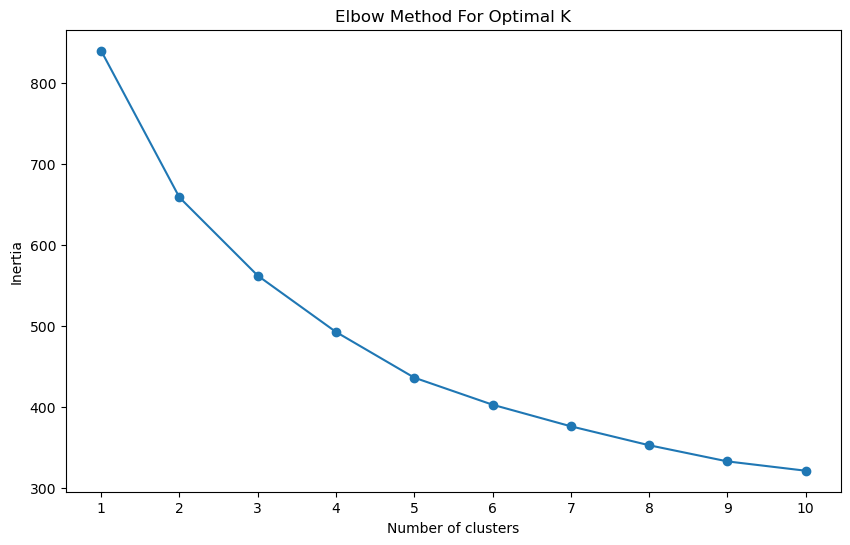

Cluster 0 characteristics:
danceability          0.456722
energy                0.399872
key                   5.111111
loudness            -14.352389
mode                  0.777778
speechiness           0.065850
acousticness          0.523811
instrumentalness      0.424884
liveness              0.190017
valence               0.342939
tempo               121.289611
duration_seconds    219.223056
time_signature        4.000000
popularity           63.055556
Cluster               0.000000
dtype: float64
Cluster 1 characteristics:
danceability          0.686500
energy                0.744611
key                   7.222222
loudness             -7.078056
mode                  0.611111
speechiness           0.352183
acousticness          0.199008
instrumentalness      0.069878
liveness              0.395167
valence               0.618389
tempo               142.694667
duration_seconds    224.417722
time_signature        3.944444
popularity           58.222222
Cluster               1.000000
d

C:\Users\14dav\AppData\Local\Temp\ipykernel_308\3907676746.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cluster_features = combined_df[combined_df['Cluster'] == i].mean()


In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

features = combined_df[['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'liveness', 'speechiness', 'popularity']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
K_range = range(1, 11)
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.show()

optimal_K = 3
kmeans = KMeans(n_clusters=optimal_K, random_state=42)
combined_df['Cluster'] = kmeans.fit_predict(scaled_features)

for i in range(optimal_K):
    print(f'Cluster {i} characteristics:')
    cluster_features = combined_df[combined_df['Cluster'] == i].mean()
    print(cluster_features)

The results from clustering the data within the albums and tracks based on the audio features shows that within Cluster 0, there's lower levels of danceability, loudness, valnce, and so on. This cluster is more representative of tracks with a more laid back vibe with possibly more instrumentals or acoustic going on. Cluster 1 has higher speechiness, liveness suggessting live recordings or tracks mimicing a live feel, high energy, tempo, and valence. These tracks overall are more upbeat and energetic. Cluster 2 has high danceability and valence, indicating that these tracks are more cheerful, with lower acousticness and instrumentalness, showing a strong electronic or produced sound. There's high popularity scores within this cluster meaning they're the most mainstream and popular songs. Overall, the cluster helps us in understanding the musical elements that make up a track's success. However, with this there's multiple factors at play and success within music is very multifaceted with many factors going beyond what's measurable in audio features.

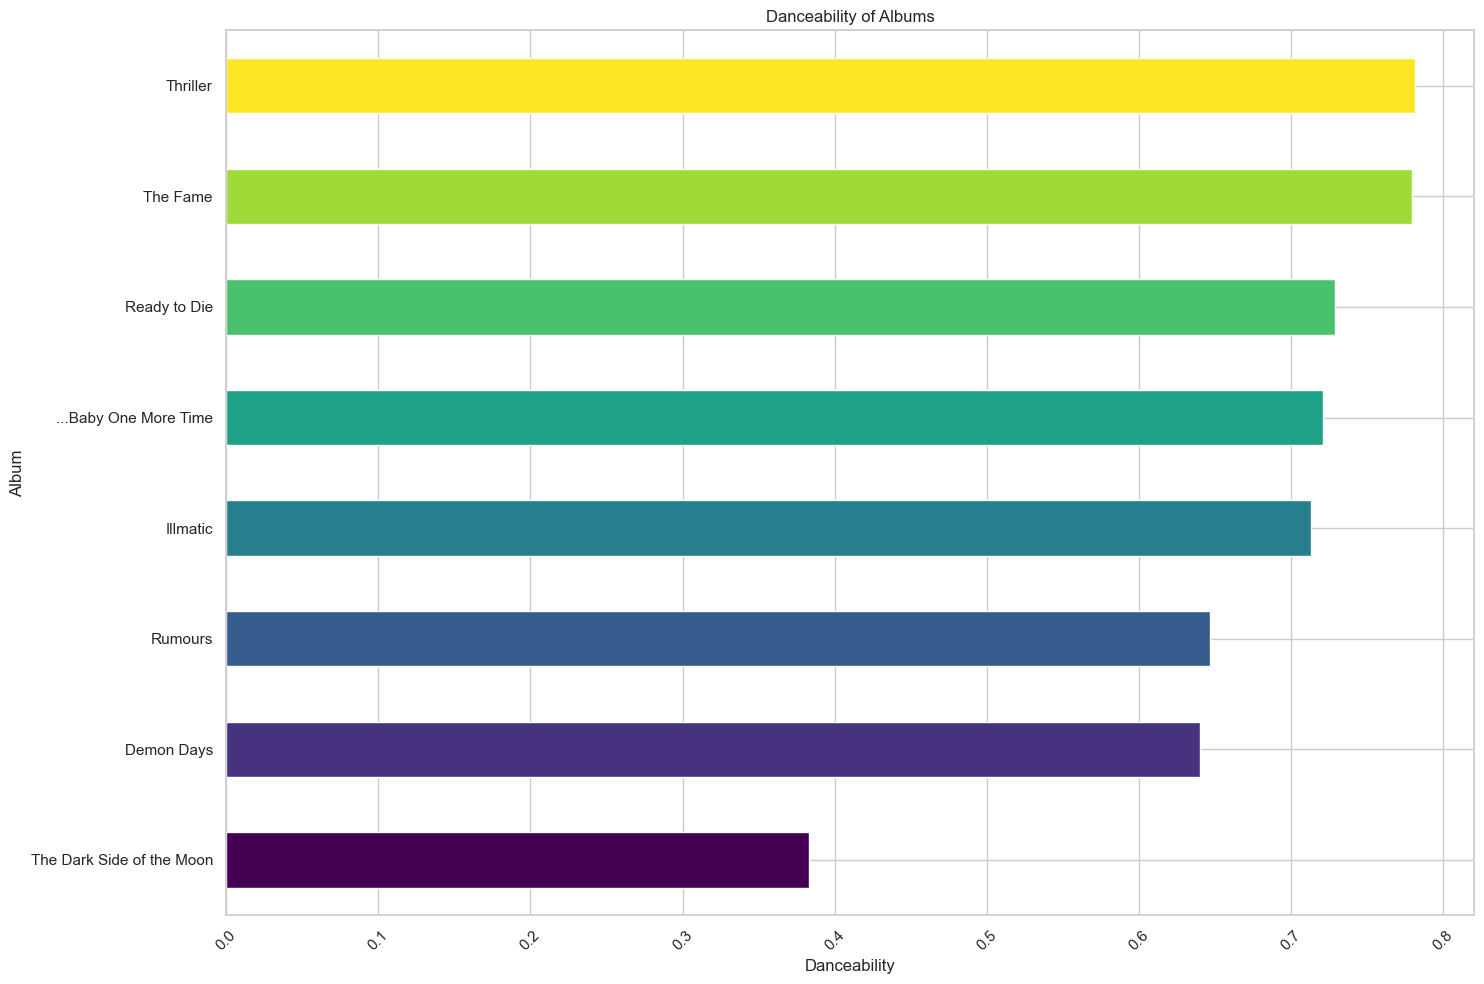

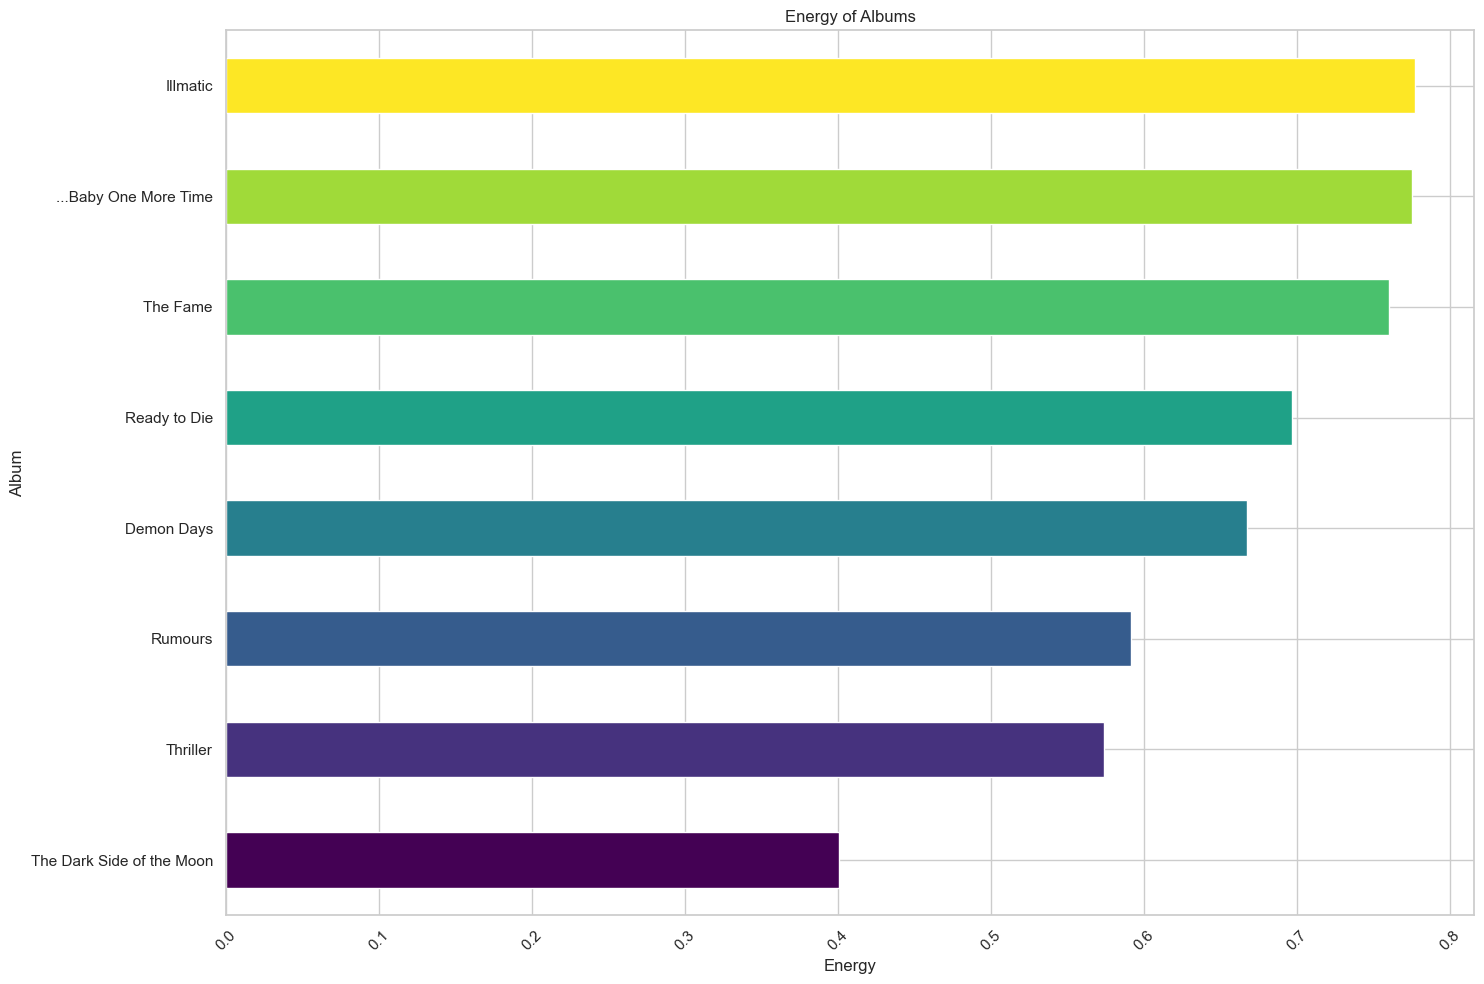

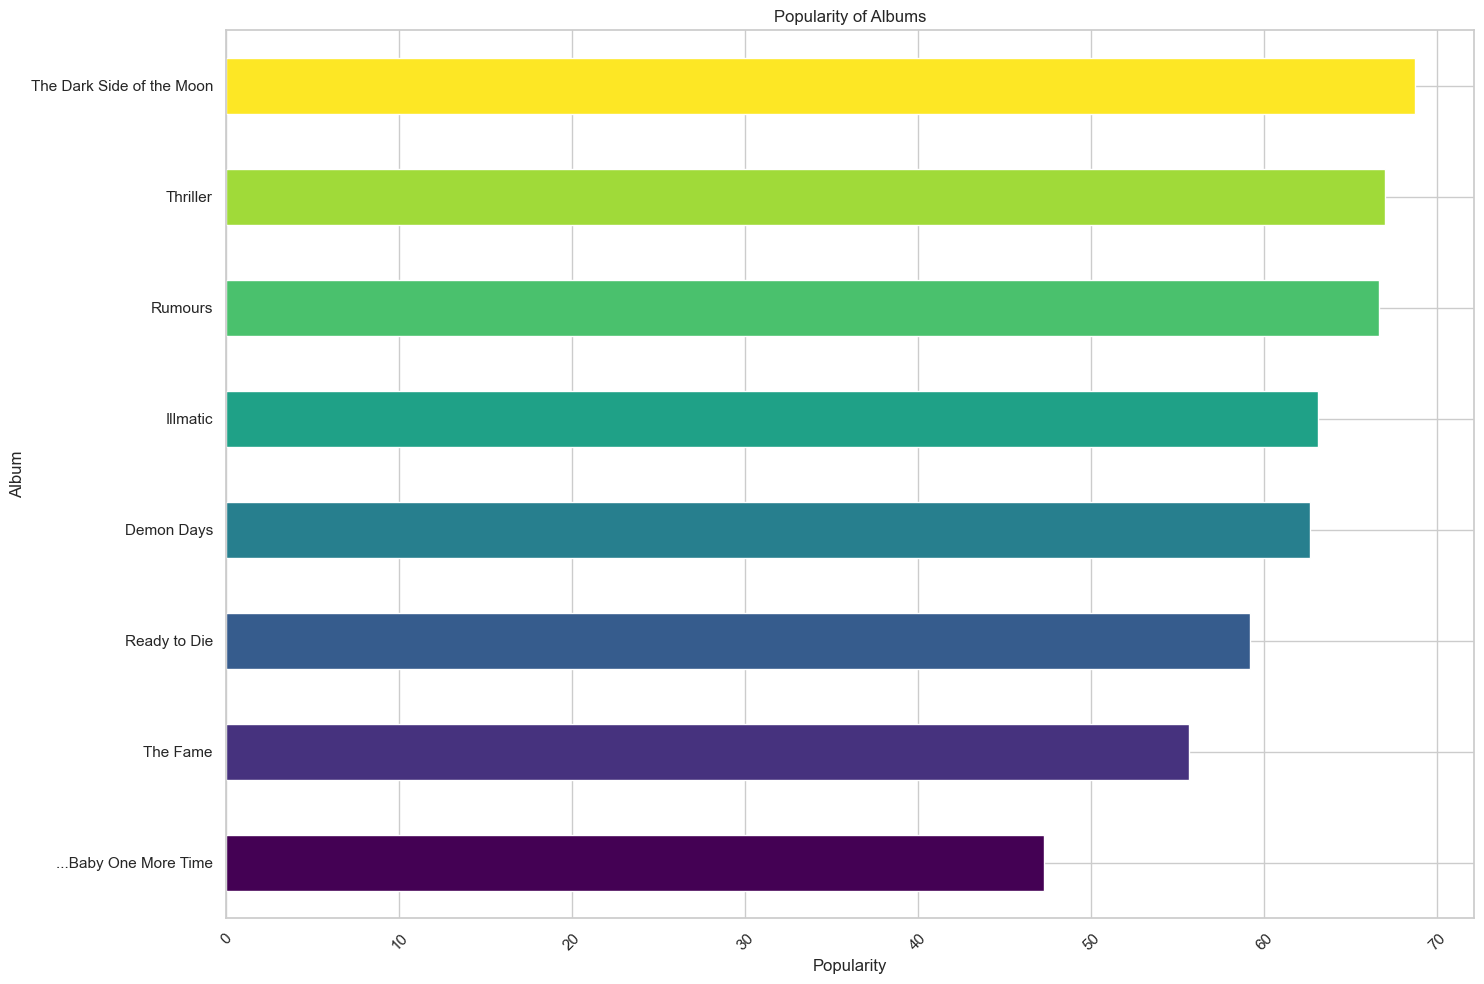

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_attribute(df, attribute, title):
    plt.figure(figsize=(15, 10))
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(df)))
    
    df.sort_values(by=attribute)[attribute].plot(kind='barh', color=colors)
    plt.title(title)
    plt.xlabel(attribute)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_attribute(all_mean_df, 'Danceability', 'Danceability of Albums')
plot_attribute(all_mean_df, 'Energy', 'Energy of Albums')
plot_attribute(all_mean_df, 'Popularity', 'Popularity of Albums')


As we can see, the album with the highest danceability is Thriller by Michael Jackson. Having listened to the songs on that album before, as I'm sure most people have, this isn't too surprising. I am a little, though, because there are two Electronic/Dance albums, and I thought one of those would've just pulled ahead of Thriller. The Fame by Lady Gaga was just right behind Thriller, though. Surprisingly the album with the most energy was Illmatic by Nas, and this barely pulled ahead over ...Baby One More Time by Britney Spears. Having heard the whole album, you feel quite a bit of energy from the songs, but I'm definitely surprised by this. It could be a factor as to why it's one of the most popular Rap albums of all time. Finally, when it comes to the album with the highest popularity, it goes to Pink Floyd's The Dark Side of the Moon. Again, this is when it comes to Spotify, but Spotify is the largest music streaming app in the world, so there's a big sample size of users. In terms of albums sold overall, though, Thriller by Michael Jackson has the most at over 70 million copies sold worldwide. The Dark Side of the Moon isn't far behind, though, at roughly 45 million albums sold, making it the fourth most-sold album of all time.

Next, we will compare the eight albums along with the two most popular songs from each album.

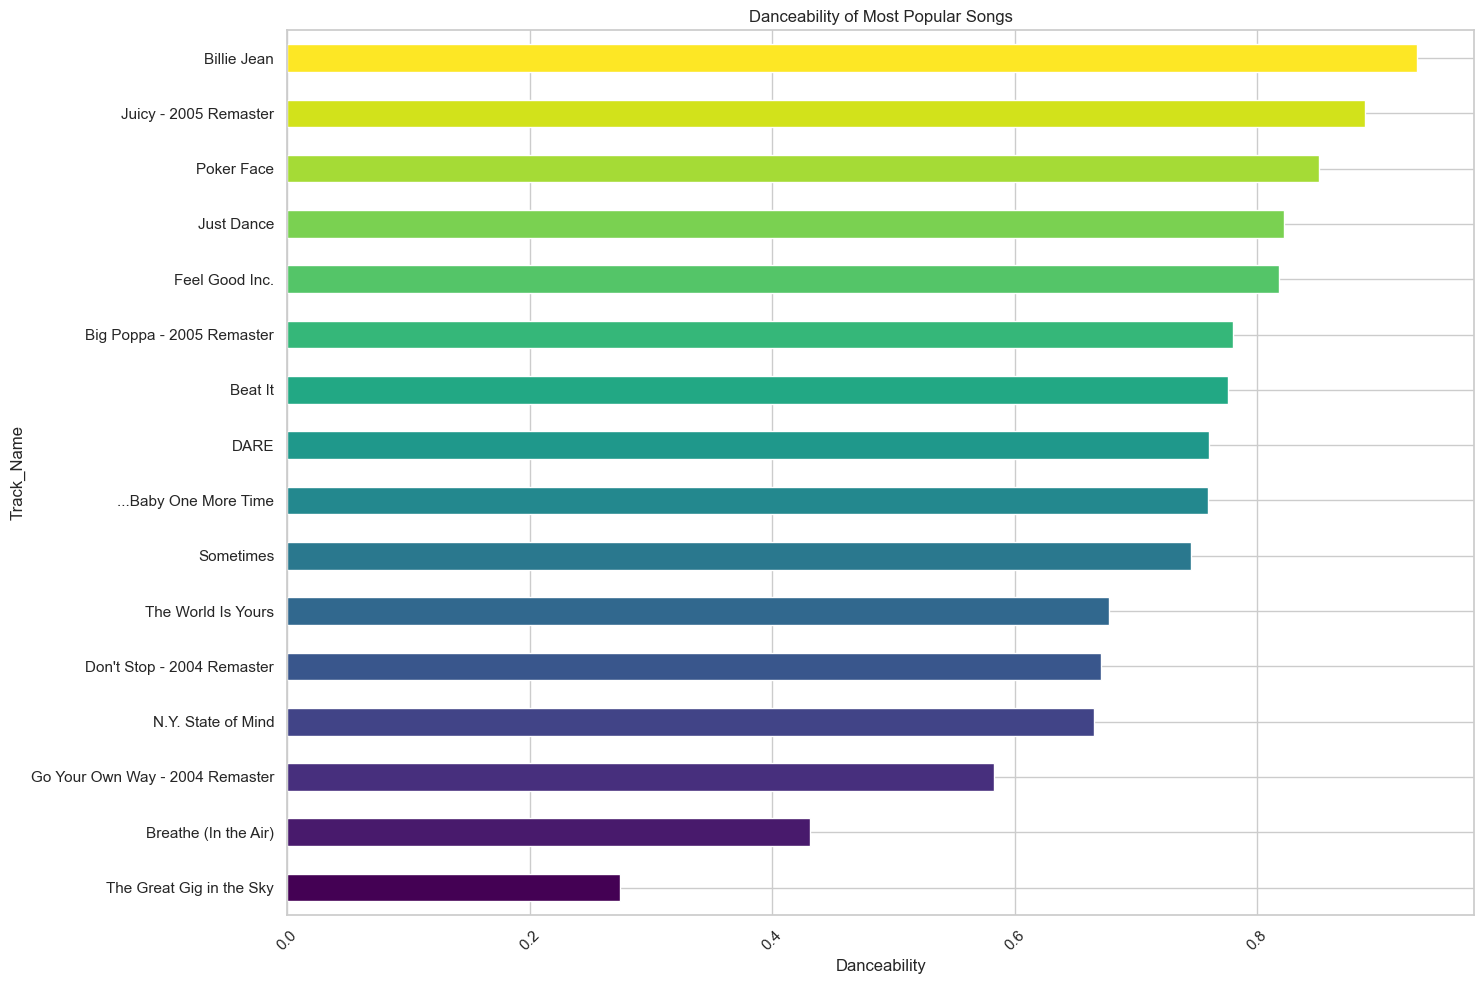

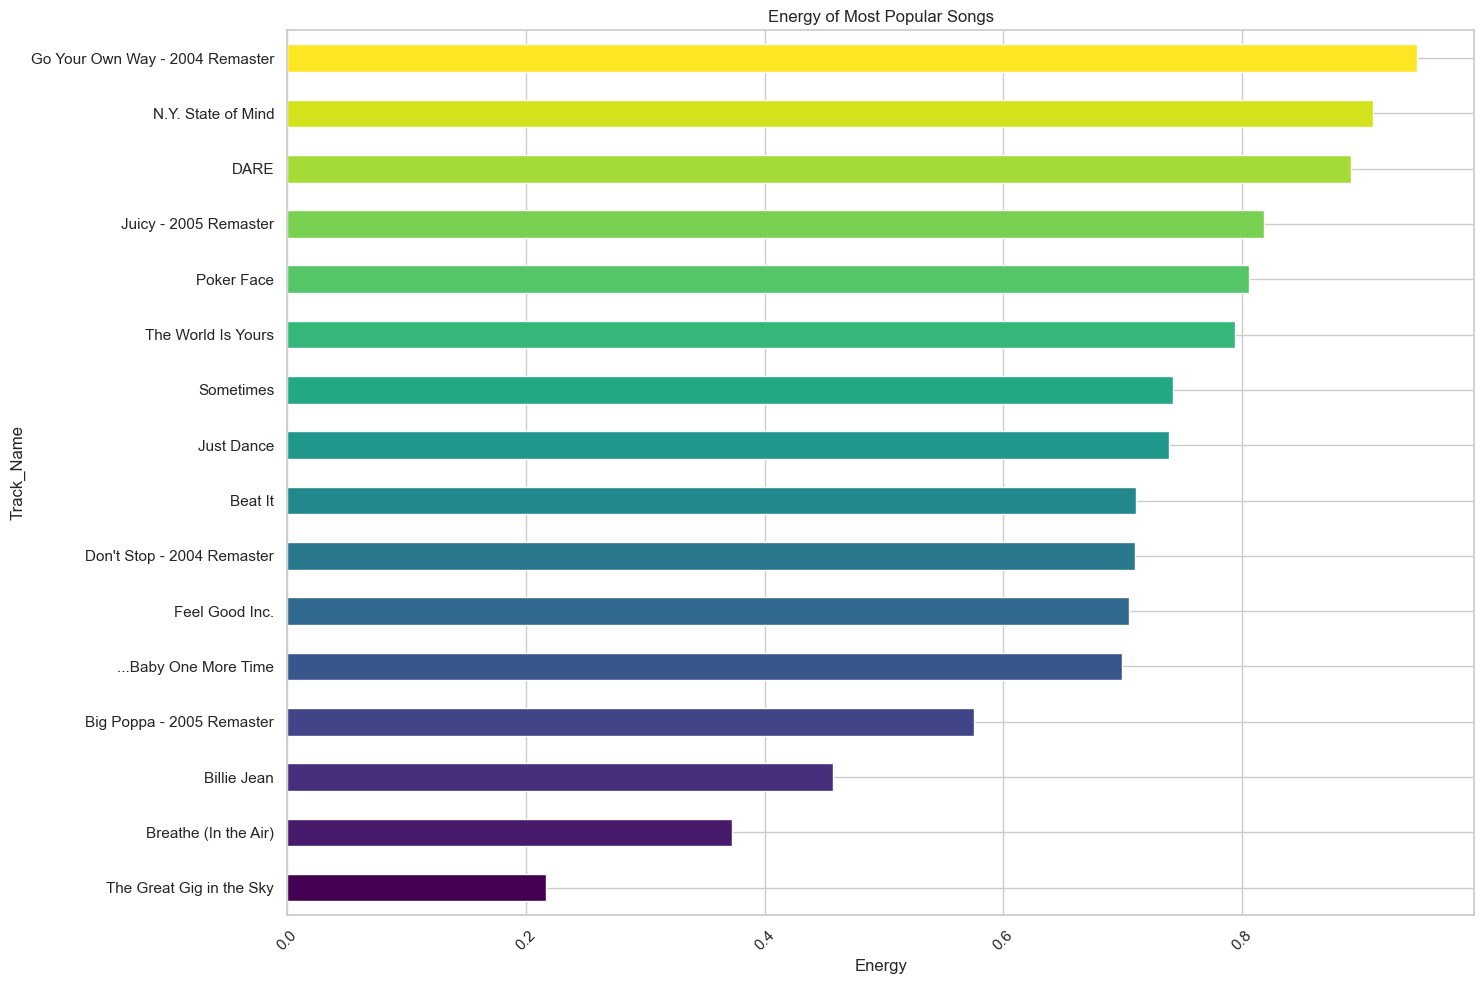

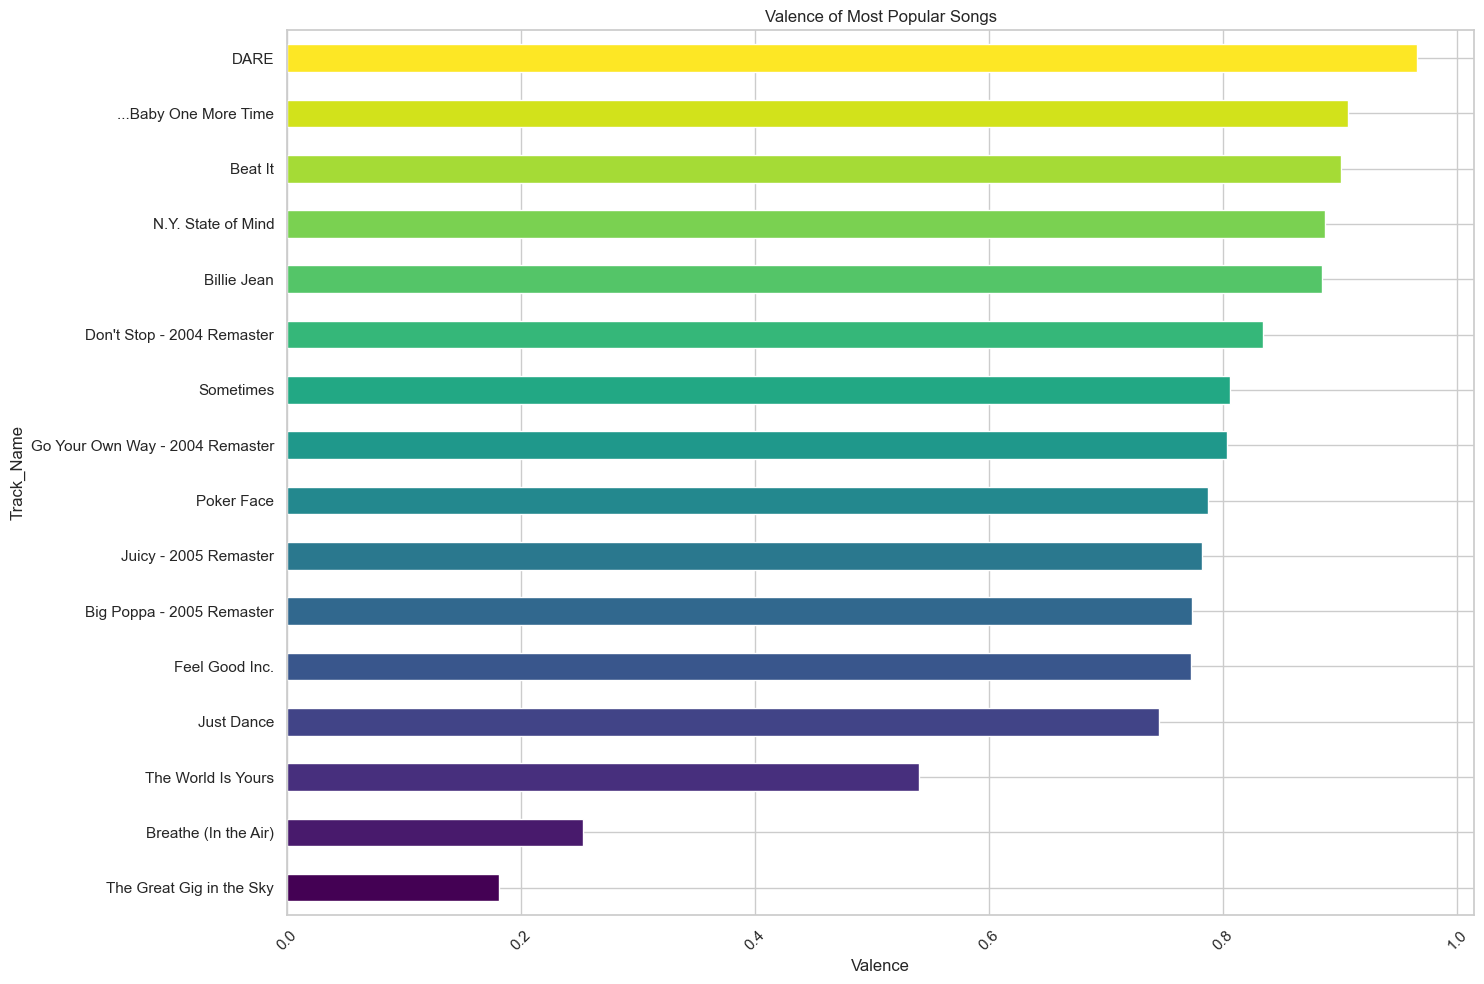

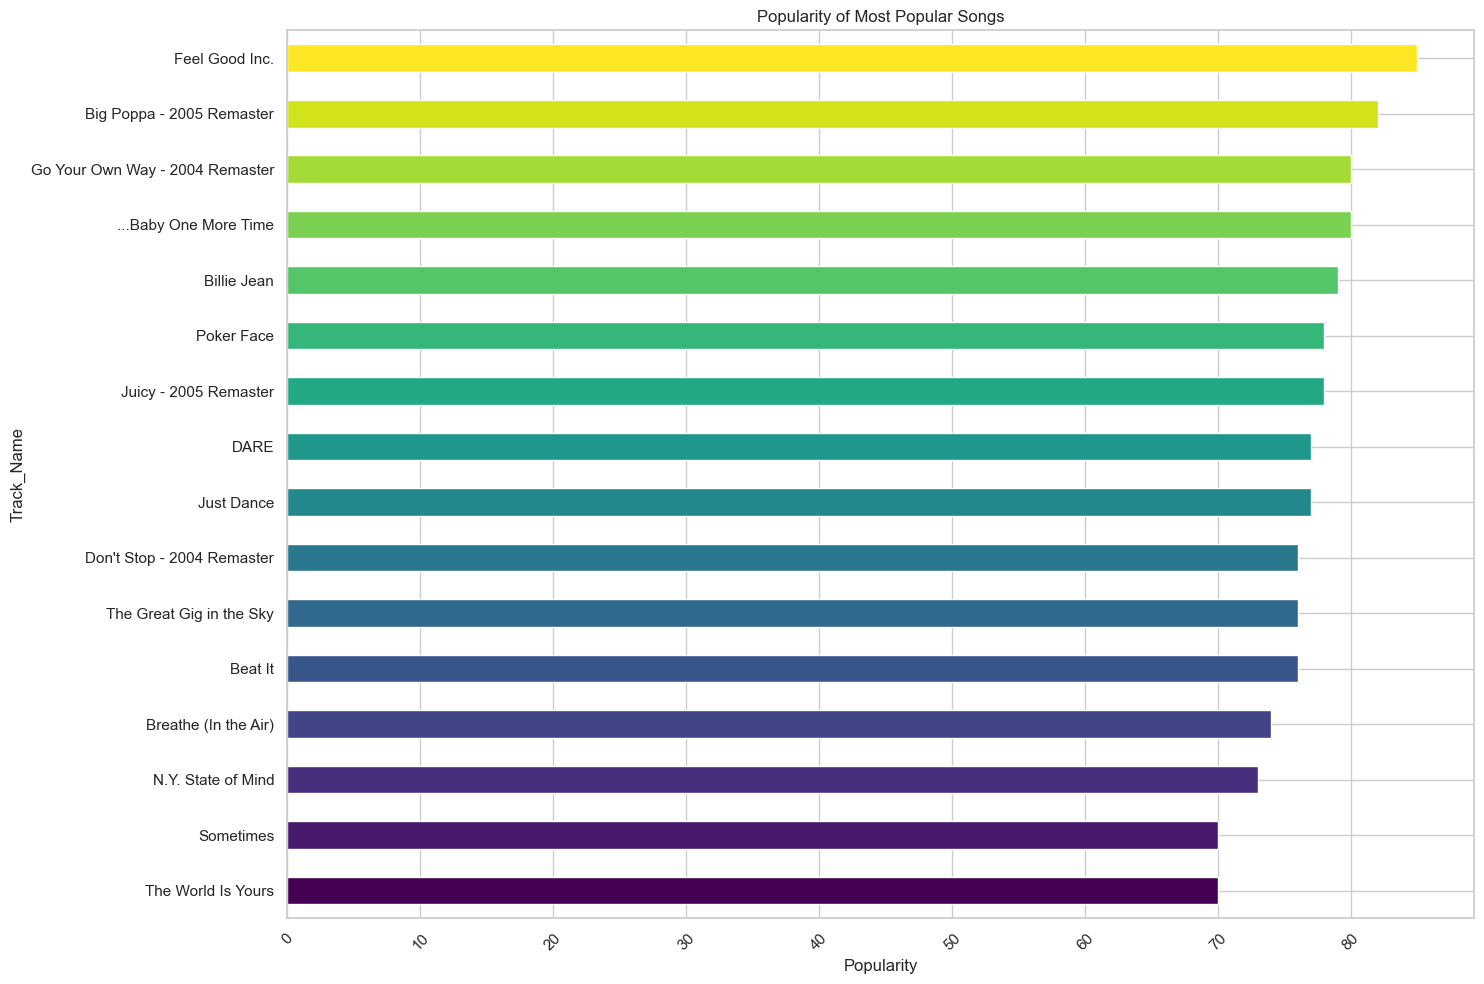

In [76]:
def get_audio_features_and_popularity(track_ids):
    audio_features = sp.audio_features(track_ids)
    track_popularity = [sp.track(id)["popularity"] for id in track_ids]
    
    for feature, popularity in zip(audio_features, track_popularity):
        feature["popularity"] = popularity

    return audio_features

def create_audio_features_dataframe(audio_features, track_names):
    df = pd.DataFrame(audio_features)

    df.drop(columns=['type', 'uri', 'track_href', 'analysis_url'], inplace=True)

    df['duration_ms'] = df['duration_ms'] / 1000
    df.rename(columns={'duration_ms': 'Duration_seconds'}, inplace=True)

    df['Track_Name'] = track_names

    df.set_index('Track_Name', inplace=True)

    df.columns = [col.capitalize() for col in df.columns]

    return df

popular_tracks_dfs = []

for album_id in album_ids:
    track_ids, track_names = get_track_ids_and_names_from_album(album_id)
    audio_features = get_audio_features_and_popularity(track_ids)
    audio_features_df = create_audio_features_dataframe(audio_features, track_names)
    
    sorted_by_popularity = audio_features_df.sort_values(by='Popularity', ascending=False)
    top_two_tracks = sorted_by_popularity.head(2)
    
    popular_tracks_dfs.append(top_two_tracks)

all_popular_tracks_df = pd.concat(popular_tracks_dfs)

def plot_attribute(df, attribute, title):
    plt.figure(figsize=(15, 10))
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(df)))
    
    df.sort_values(by=attribute)[attribute].plot(kind='barh', color=colors)
    plt.title(title)
    plt.xlabel(attribute)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_attribute(all_popular_tracks_df, 'Danceability', 'Danceability of Most Popular Songs')
plot_attribute(all_popular_tracks_df, 'Energy', 'Energy of Most Popular Songs')
plot_attribute(all_popular_tracks_df, 'Valence', 'Valence of Most Popular Songs')
plot_attribute(all_popular_tracks_df, 'Popularity', 'Popularity of Most Popular Songs')

The song with the highest danceability rating is Billie Jean by Michael Jackson. This is one of his most famous songs of all time, so whoever is reading this has more likely than not heard it before, and I will say, there's definitely some room for dancing. The beat carries the danceability rating. Go Your Own Way by Fleetwood Mac has the highest energy out of any song, and it's also one of their most popular songs of all time. I've heard it before on its own and in various commercials, and that's why it's used in commercials because of the energy it brings. The song with the highest Valence, which is again, the song that exudes a very positive and cheerful sound. I had to listen to it again since it's been a while, and it definitely deserves the top spot. For me, though, ...Baby One More Time which is at second, not so much. Finally, the song out of all albums with the highest popularity rating is Feel Good Inc. by the Gorillaz. They actually took two out of the four categories. Feel Good Inc. on Spotify has just over 1.1B plays, which I thought it would have more, but I looked at the other songs just below it, and it is indeed the most popular out of them all. I was surprised, considering the album the song was on came out in 2005, which was when buying CDs and songs off iTunes were at their height, so I can't imagine how well it did in those spaces.

Overall my goal with comparing some of the most popular and well-received albums of all time from these four genres along with songs from those albums was to see if there was any overlap or common theme that they all had that makes a recipe for a successful project. What we can draw from the results are:

In general, the songs in these albums have high danceability scores, suggesting that a good rhythm and a beat that's easy to dance to can contribute to an album's popularity.

Energy levels are quite high across these albums, implying that more energetic songs could be more engaging to listeners.

As expected, the popularity scores for songs from these albums are relatively high. However, it's worth noting that recent play counts influence popularity on Spotify, and thus newer albums or songs might have higher popularity scores.

The valence, or musical positiveness, varies across these albums. Some albums have a higher valence, suggesting more positive, happier music, while others are lower, indicating more serious, possibly sadder music. This suggests that while the mood of the music can vary quite a bit, it doesn't necessarily impact an album's overall popularity.

There's often considerable variation within albums, with the two most popular songs sometimes differing significantly in their musical attributes. This suggests that having a variety of songs that appeal to different listener preferences can be a successful strategy for an album.

Comparing the most popular songs from each album makes it difficult to draw overarching conclusions because musical taste is highly subjective and can depend on many factors. However, we can say that these songs tend to exhibit a good balance of danceability and energy.

So overall, the danceability, energy level, and variation of songs and an album as a whole are the key aspects that can contribute to a popular album.